<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/introducci-n-al-Machine-Learning/blob/main/classes/class_13/class_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/marco-canas/introducci-n-al-Machine-Learning/blob/main/classes/class_13/class_13.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table> 


# Asignar ejercicios sin repetición

In [7]:
import numpy as np 
import pandas as pd 

grupo_intro_ml = pd.read_csv('grupo_intro_ml.csv')
grupo_intro_ml.Email.to_csv('Email.csv', index = False )

n = 80

lista_ejercicios = list(range(1,n+1))

np.random.seed(14)

def elegir_5_ejercicios_diferentes(lista_ejercicios):
    ejercicios_asignados = []
    for i in range(5):
        a = np.random.choice(lista_ejercicios)
        ejercicios_asignados.append(a)
        lista_ejercicios.remove(a)
    return (lista_ejercicios, ejercicios_asignados)   


b = []
n_estudiantes = len(grupo_intro_ml) 
for i in range(n_estudiantes):
    lista_ejercicios, c = elegir_5_ejercicios_diferentes(lista_ejercicios)
    b.append(c)
    
    
parcial_1 = pd.Series( b, \
                      index = grupo_intro_ml.Nombre.values )
 
parcial_1    

ALVAREZ CARRERO GERMAN JOSE               [13, 24, 74, 31, 11]
ARANGO JARAMILLO JUAN JOSE                 [66, 30, 29, 39, 5]
BOLIVAR HIGUITA JUAN PABLO                  [14, 15, 1, 8, 50]
BUITRAGO LORA VANESSA                      [55, 54, 53, 6, 25]
CORRALES BOHÓRQUEZ ANGEL                   [9, 23, 67, 80, 33]
GALLEGO JARAMILLO JUAN PABLO               [79, 2, 51, 20, 47]
GRANADA ZAPATA SUSANA                      [46, 72, 4, 19, 71]
HERNANDEZ SUAREZ NICOLAS                   [27, 60, 42, 7, 34]
JIMÉNEZ GARCÍA MIGUEL ÁNGEL               [37, 44, 78, 38, 43]
MARTINEZ PÉREZ PEDRO ALEJANDRO            [58, 40, 16, 75, 35]
MONTOYA GONZÁLEZ PABLO ANDRÉS             [49, 70, 52, 56, 32]
MORALES GARCÍA MANUELA                    [59, 18, 68, 64, 22]
MOSQUERA PEREA JESÚS JHOVANNY             [10, 61, 26, 21, 12]
MURILLO ZAPATA MIGUEL ANGEL               [73, 76, 45, 63, 17]
RODRIGUEZ BARRIOS DAIRA LORENA             [41, 69, 3, 57, 28]
TORRES MERIÑO JOSE LUIS CAMILO            [48, 65, 36, 

# Adición y eliminación de columnas en una DataFrame

In [8]:
personas = {'año_nacimiento':[1975, 1977, 1978, 2008],
            'hobby':['Montar bicicleta', 'leer', 'patinar', 'ver netflix'],
            'peso':[86, 80, 60, 70],
            'hijos':[2, 1, 0,3]
           }

In [9]:
import pandas as pd 
personas = pd.DataFrame(personas, index = ['marco', 'julio', 'joseph', 'yasmira']) 
personas 

,año_nacimiento,hobby,peso,hijos
marco,1975,Montar bicicleta,86,2
julio,1977,leer,80,1
joseph,1978,patinar,60,0
yasmira,2008,ver netflix,70,3


In [10]:
personas['edad'] = 2022 - personas['año_nacimiento'] 
personas 

,año_nacimiento,hobby,peso,hijos,edad
marco,1975,Montar bicicleta,86,2,47
julio,1977,leer,80,1,45
joseph,1978,patinar,60,0,44
yasmira,2008,ver netflix,70,3,14


In [11]:
personas['mayor_30_años'] = personas['edad'] > 30
personas 

,año_nacimiento,hobby,peso,hijos,edad,mayor_30_años
marco,1975,Montar bicicleta,86,2,47,True
julio,1977,leer,80,1,45,True
joseph,1978,patinar,60,0,44,True
yasmira,2008,ver netflix,70,3,14,False


In [12]:
personas.pop('año_nacimiento')

marco      1975
julio      1977
joseph     1978
yasmira    2008
Name: año_nacimiento, dtype: int64

In [13]:
personas 

,hobby,peso,hijos,edad,mayor_30_años
marco,Montar bicicleta,86,2,47,True
julio,leer,80,1,45,True
joseph,patinar,60,0,44,True
yasmira,ver netflix,70,3,14,False


## Adición de columnas 

In [17]:
import numpy as np 
personas['mascotas'] = pd.Series({'marco':3, 'julio':2, 'joseph':1, 'yasmira':np.nan})
personas 

,estatura,hobby,peso,hijos,edad,mayor_30_años,mascotas
marco,165,Montar bicicleta,86,2,47,True,3.0
julio,170,leer,80,1,45,True,2.0
joseph,150,patinar,60,0,44,True,1.0
yasmira,140,ver netflix,70,3,14,False,NaN


Al agregar una **nueva columna**, se agrega **al final** (a la derecha) de forma predeterminada. 

También puedes insertar una columna en cualquier otro lugar usando el método `insert()`:

In [15]:
personas.insert(0, 'estatura', [165, 170, 150, 140])
personas 

,estatura,hobby,peso,hijos,edad,mayor_30_años
marco,165,Montar bicicleta,86,2,47,True
julio,170,leer,80,1,45,True
joseph,150,patinar,60,0,44,True
yasmira,140,ver netflix,70,3,14,False


## Asignación de nuevas columnas

También puede crear nuevas columnas llamando al método `assign()`. 

Tenga en cuenta que esto devuelve un nuevo objeto `DataFrame`, el original no se modifica:

In [18]:
personas.assign(indice_masa_corporal = personas['peso']/(personas['estatura']/100)**2,
             tiene_mascota = personas['mascotas'] > 0) 

,estatura,hobby,peso,hijos,edad,mayor_30_años,mascotas,indice_masa_corporal,tiene_mascota
marco,165,Montar bicicleta,86,2,47,True,3.0,31.588613,True
julio,170,leer,80,1,45,True,2.0,27.681661,True
joseph,150,patinar,60,0,44,True,1.0,26.666667,True
yasmira,140,ver netflix,70,3,14,False,NaN,35.714286,False


In [12]:
personas 

,estatura,hobby,peso,hijos,edad,mayor_30_años,mascotas
marco,165,Montar bicicleta,86,2,47,True,3.0
julio,170,leer,80,1,45,True,2.0
joseph,150,patinar,60,0,44,True,1.0
yasmira,140,ver netflix,70,3,14,False,NaN


In [13]:
personas.assign(indice_masa_corporal = personas['peso']/(personas['estatura']/100)**2,
             tiene_mascota = personas['mascotas'] > 0, inplace = True) 

,estatura,hobby,peso,hijos,edad,mayor_30_años,mascotas,indice_masa_corporal,tiene_mascota,inplace
marco,165,Montar bicicleta,86,2,47,True,3.0,31.588613,True,True
julio,170,leer,80,1,45,True,2.0,27.681661,True,True
joseph,150,patinar,60,0,44,True,1.0,26.666667,True,True
yasmira,140,ver netflix,70,3,14,False,NaN,35.714286,False,True


In [14]:
personas

,estatura,hobby,peso,hijos,edad,mayor_30_años,mascotas
marco,165,Montar bicicleta,86,2,47,True,3.0
julio,170,leer,80,1,45,True,2.0
joseph,150,patinar,60,0,44,True,1.0
yasmira,140,ver netflix,70,3,14,False,NaN


In [15]:
personas = personas.assign(indice_masa_corporal = personas['peso']/(personas['estatura']/100)**2,
             tiene_mascota = personas['mascotas'] > 0) 

In [16]:
personas 

,estatura,hobby,peso,hijos,edad,mayor_30_años,mascotas,indice_masa_corporal,tiene_mascota
marco,165,Montar bicicleta,86,2,47,True,3.0,31.588613,True
julio,170,leer,80,1,45,True,2.0,27.681661,True
joseph,150,patinar,60,0,44,True,1.0,26.666667,True
yasmira,140,ver netflix,70,3,14,False,NaN,35.714286,False


# Evaluar una expresión

Una gran característica compatible con pandas es la evaluación de expresiones. 

Esto se basa en la biblioteca `numexpr` que debe estar instalada.

In [19]:
personas.eval('peso/(estatura/100)**2 > 25')

marco      True
julio      True
joseph     True
yasmira    True
dtype: bool

También se admiten expresiones de asignación. Configuremos `inplace=True` para modificar directamente el `DataFrame` en lugar de obtener una **copia modificada**:

In [20]:
personas.eval("indice_masa_corporal = peso / (estatura/100) ** 2", inplace=True)
personas

,estatura,hobby,peso,hijos,edad,mayor_30_años,mascotas,indice_masa_corporal
marco,165,Montar bicicleta,86,2,47,True,3.0,31.588613
julio,170,leer,80,1,45,True,2.0,27.681661
joseph,150,patinar,60,0,44,True,1.0,26.666667
yasmira,140,ver netflix,70,3,14,False,NaN,35.714286


Puede usar una variable local o global en una expresión prefijándola con `@`:

In [21]:
umbral_sobre_peso = 30
personas.eval("sobre_peso = indice_masa_corporal > @umbral_sobre_peso", inplace=True)

personas

,estatura,hobby,peso,hijos,edad,mayor_30_años,mascotas,indice_masa_corporal,sobre_peso
marco,165,Montar bicicleta,86,2,47,True,3.0,31.588613,True
julio,170,leer,80,1,45,True,2.0,27.681661,False
joseph,150,patinar,60,0,44,True,1.0,26.666667,False
yasmira,140,ver netflix,70,3,14,False,NaN,35.714286,True


## Querying a DataFrame (Consultar en el DataFrame)

El método `query()` le permite filtrar un `DataFrame` basado en una expresión de consulta:

In [22]:
personas.query("edad > 30 and mascotas == 2")

,estatura,hobby,peso,hijos,edad,mayor_30_años,mascotas,indice_masa_corporal,sobre_peso
julio,170,leer,80,1,45,True,2.0,27.681661,False


## Ordenar un DataFrame

Puede ordenar un `DataFrame` llamando a su método `sort_index`. 

Por defecto, ordena las filas por su etiqueta de índice, en orden ascendente, pero invirtamos el orden(`ascending = False`):

In [23]:
personas.sort_index(ascending=True)

,estatura,hobby,peso,hijos,edad,mayor_30_años,mascotas,indice_masa_corporal,sobre_peso
joseph,150,patinar,60,0,44,True,1.0,26.666667,False
julio,170,leer,80,1,45,True,2.0,27.681661,False
marco,165,Montar bicicleta,86,2,47,True,3.0,31.588613,True
yasmira,140,ver netflix,70,3,14,False,NaN,35.714286,True


## Taller de clase o tarea

Se lanzan al aire dos dados y se suman sus puntos obtenidos. Halla la probabilidad de que la suma:  

a) Sea 4.  
b) No sea 7.  
c) Sea mayor que 7.  
d) Sea menor que 5.  
e) Sea 6 o 9.  
f) Esté entre 2 y 6.  

# [Matplotlib según Geron](https://github.com/ageron/handson-ml2/blob/master/tools_matplotlib.ipynb) 

Tabla de contenido  

1.  Trazado de un primer gráfico
2.  Color y estilo de línea.
3.  Exportar la figura en diferentes formatos
4.  Subplots  
5.  Multiple figures  

5.  Incluir texto en el gráfico
7.  Legends
8.  Non linear scales

8.  3D projection
9.  Scatter plot
10.  Lines

11.  Histograms
12.  Images
13.  Animations
14.  Saving animations to video files


# Trazando tu primer gráfico

Primero necesitamos importar la biblioteca `matplotlib`.

In [ ]:
import matplotlib

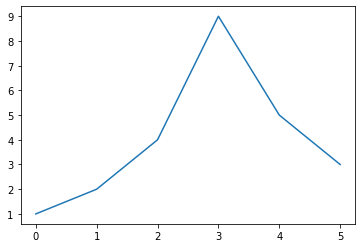

In [24]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 4, 9, 5, 3])
plt.show()

Sí, es tan simple como llamar a la función `plot` con algunos datos y luego llamar a la función `show`.

Si a la función `plot` se le da solo una matriz de datos,  

* la usará como las coordenadas en el eje vertical, y 
* solo usará el índice de cada punto de datos en la matriz como la coordenada horizontal. 

También puede proporcionar dos matrices: 

* una para el eje horizontal `x` y 
* la segunda para el eje vertical `y`:

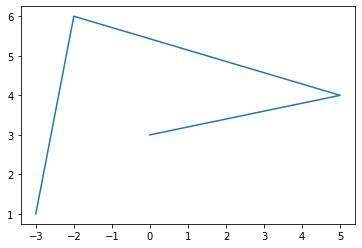

In [3]:
plt.plot([-3, -2, 5, 0], [1, 6, 4, 3])
plt.show()

**Ojo**  

Los ejes coinciden automáticamente con la extensión de los datos. 

Nos gustaría darle un poco más de espacio al gráfico, así que llamemos a la función `axis` para cambiar la extensión de cada eje . Para ello entregamos como argumento a la función axis una lista de python como la siguiente: `[xmin, xmax, ymin, ymax]`.

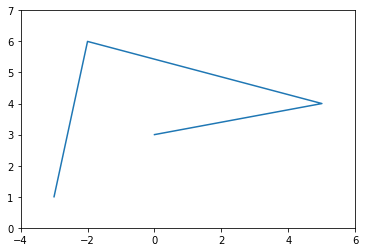

In [2]:
import matplotlib.pyplot as plt 

x = [-3, -2, 5, 0]
y = [1, 6, 4, 3]
plt.plot(x,y )

plt.axis([min(x) - 1, max(x) + 1, min(y) -1, max(y) + 1])
plt.show()


Ahora, grafiquemos una función matemática. 

* Usamos la función `linspace` de NumPy para crear una matriz `x` que contiene 10 flotantes que van desde -2 a 2, 
* luego creamos una segunda matriz `y` calculada como el cuadrado de `x` (para aprender sobre NumPy, lea [el tutorial de NumPy](https://github.com/ageron/handson-ml2/blob/8b454ea71235cd0f6fa8c72a5d8be17204f674eb//tools_numpy.ipynb)).

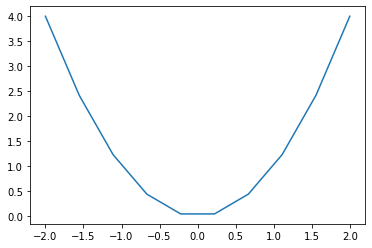

In [2]:
import matplotlib.pyplot as plt 
import numpy as np
x = np.linspace(-2, 2, 10)
y = x**2

plt.plot(x, y)
#plt.show()

Eso es un poco seco, agreguemos un título y etiquetas `x` e `y`, y dibujemos una cuadrícula.

In [ ]:
plt.plot(x, y)
plt.title("Función cuadrática")
plt.xlabel("x")
plt.ylabel(r"$y = x^{2}$")
plt.grid(True)
plt.show()

## Estilo y color de línea

Por defecto, `matplotlib` dibuja una línea entre puntos consecutivos.

In [ ]:
plt.plot([0, 100, 100, 0, 0, 100, 50, 0, 100], [0, 0, 100, 100, 0, 100, 130, 100, 0])
plt.axis([-10, 110, -10, 140])
plt.show()

Puede pasar un tercer argumento para cambiar el estilo y el color de la línea. 

Por ejemplo, `g--` significa "línea discontinua verde".

In [ ]:
import matplotlib.pyplot as plt 

plt.plot([0, 100, 100, 0, 0, 100, 50, 0, 100], [0, 0, 100, 100, 0, 100, 130, 100, 0], "g--")
# r^, r<,r>,rs,
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
plt.axis([-10, 110, -10, 140])
plt.show()

Puede trazar varias líneas en un gráfico de forma muy sencilla: simplemente pase `x1, y1, [estilo1], x2, y2, [estilo2], ...`  

Por ejemplo:

In [ ]:
plt.plot([0, 100, 100, 0, 0], [0, 0, 100, 100, 0], "r-",\
         [0, 100, 50, 0, 100], [0, 100, 130, 100, 0], "g--")
plt.axis([-10, 110, -10, 140])
plt.show()

O simplemente llame a `plot` varias veces antes de llamar a `show`.

In [ ]:
plt.plot([0, 100, 100, 0, 0], [0, 0, 100, 100, 0], "r-")
plt.plot([0, 100, 50, 0, 100], [0, 100, 130, 100, 0], "g--")
plt.axis([-10, 110, -10, 140])
plt.show()

También puede dibujar puntos simples en lugar de líneas. 

Aquí hay un ejemplo con guiones verdes, línea punteada roja y triángulos azules. 

Consulte [la documentación](https://matplotlib.org/2.0.2/api/pyplot_api.html) para ver la lista completa de opciones de estilo y color.

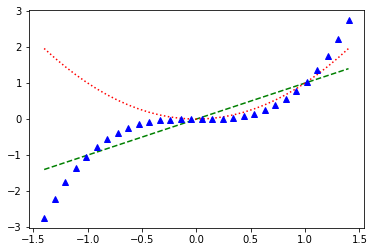

In [3]:
import numpy as np 
x = np.linspace(-1.4, 1.4, 30)
plt.plot(x, x, 'g--', x, x**2, 'r:', x, x**3, 'b^')
plt.show()

La función de trazado `plot()` devuelve una lista de objetos `Line2D` (uno para cada línea). 

Puede establecer atributos adicionales en estas líneas, como el ancho de línea(`linewidth`), el estilo de guión(`dash_style`) o el nivel `alpha`. 

Consulte la lista completa de atributos en la documentación.

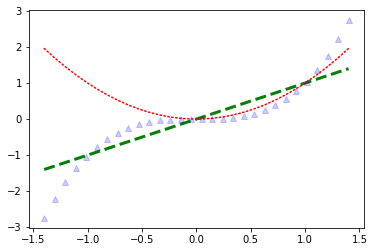

In [4]:
x = np.linspace(-1.4, 1.4, 30)
line1, line2, line3 = plt.plot(x, x, 'g--', x, x**2, 'r:', x, x**3, 'b^')
line1.set_linewidth(3.0)
line2.set_dash_capstyle("round")
line3.set_alpha(0.2)
plt.show()

## Guardar una figura  

Guardar una figura en el disco es tan simple como llamar a `savefig` con el nombre del archivo (o un objeto de archivo). Los formatos de imagen disponibles dependen del backend de gráficos que utilice.

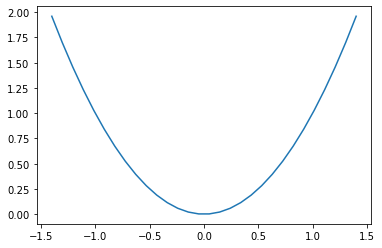

In [6]:
x = np.linspace(-1.4, 1.4, 30)
plt.plot(x, x**2)
plt.savefig("my_square_function.png", transparent=False)

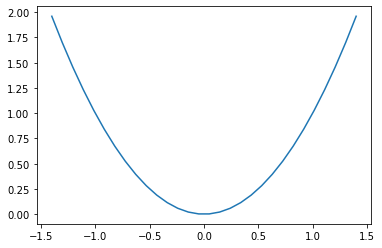

In [7]:
x = np.linspace(-1.4, 1.4, 30)
plt.plot(x, x**2)
plt.savefig("my_square_function.jpg", transparent=False)

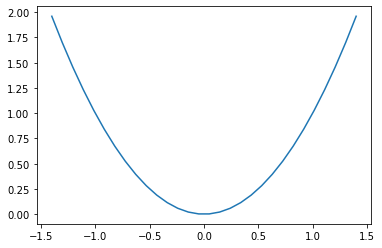

In [8]:
x = np.linspace(-1.4, 1.4, 30)
plt.plot(x, x**2)
plt.savefig("my_square_function.pdf", transparent=False)

## `subplots`  

Una figura de `matplotlib` puede contener varios subgráficos. 

Estos subgráficos están organizadas en una cuadrícula. 

Para crear un subgráfico, simplemente llame a la función `subplot()` y especifique:

* el número de filas y 
* columnas en la figura, y 
* el índice del subgráfico en la que desea dibujar (comenzando desde 1, luego de izquierda a derecha y de arriba a abajo). 

Tenga en cuenta que `pyplot` realiza un seguimiento del subgráfico actualmente activo (a la que puede obtener una referencia llamando a `plt.gca()`), por lo que cuando llama a la función `plot()`, se basa en el subgráfico activo.

In [ ]:
x = np.linspace(-1.4, 1.4, 30)

plt.subplot(2, 2, 1)  # 2 rows, 2 columns, 1st subplot = top left
plt.plot(x, x)

plt.subplot(2, 2, 2)  # 2 rows, 2 columns, 2nd subplot = top right
plt.plot(x, x**2)

plt.subplot(2, 2, 3)  # 2 rows, 2 columns, 3rd subplot = bottow left
plt.plot(x, x**3)

plt.subplot(2, 2, 4)  # 2 rows, 2 columns, 4th subplot = bottom right
plt.plot(x, x**4)

plt.show()

Tenga en cuenta que `subplot(223)` es una abreviatura de `subplot(2, 2, 3)`.

Es fácil crear subgráficos que abarquen varias celdas de cuadrícula de esta manera:

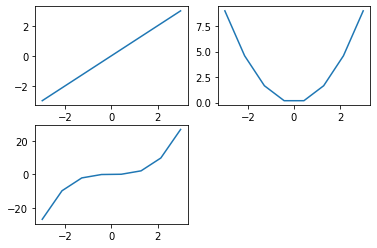

In [22]:
import numpy as np 
import matplotlib.pyplot as plt 
x = np.linspace(-3,3,8)  

plt.subplot(2, 2, 1)  # 2 rows, 2 columns, 1st subplot = top left
plt.plot(x, x)

plt.subplot(2, 2, 2)  # 2 rows, 2 columns, 2nd subplot = top right
plt.plot(x, x**2)

plt.subplot(2, 2, 3)  # 2 rows, *1* column, 2nd subplot = bottom
plt.plot(x, x**3)

plt.show()

Si necesita un posicionamiento de subgráfico más complejo, puede usar `subplot2grid` en lugar de `subplot()`. 

Usted especifica el número de filas y columnas en la cuadrícula, luego la posición de su subgráfico en esa cuadrícula (arriba a la izquierda = (0,0)) y, opcionalmente, cuántas filas y/o columnas abarca. 

Por ejemplo:

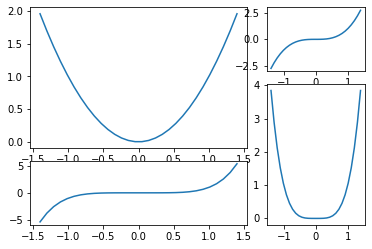

In [9]:
plt.subplot2grid((3,3), (0, 0), rowspan=2, colspan=2)
plt.plot(x, x**2)
plt.subplot2grid((3,3), (0, 2))
plt.plot(x, x**3)
plt.subplot2grid((3,3), (1, 2), rowspan=2)
plt.plot(x, x**4)
plt.subplot2grid((3,3), (2, 0), colspan=2)
plt.plot(x, x**5)
plt.show()

Si necesita aún más flexibilidad en el posicionamiento de subparcelas, consulte [la documentación de GridSpec](https://matplotlib.org/2.0.2/users/gridspec.html)

## Múltiples figuras

También es posible dibujar varias figuras. 

Cada figura puede contener una o más subtramas. Por defecto, `matplotlib` crea `figure(1)` automáticamente. 

Cuando cambia de figura, `pyplot` realiza un seguimiento de la figura actualmente activa (a la que puede obtener una referencia llamando a `plt.gcf()`), y la subtrama activa de esa figura se convierte en la subtrama actual.

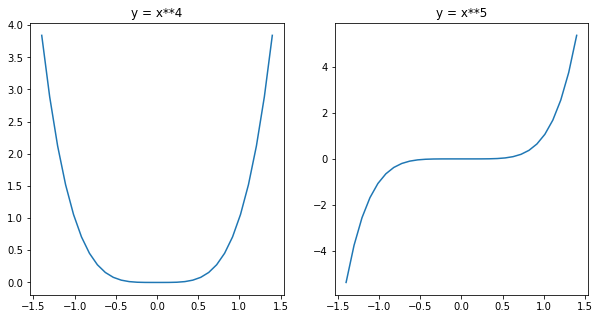

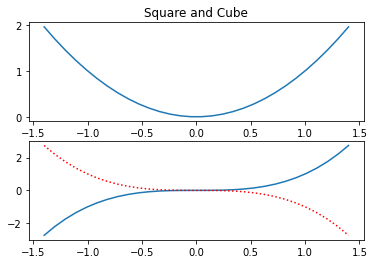

In [10]:
x = np.linspace(-1.4, 1.4, 30)

plt.figure(1)
plt.subplot(211)
plt.plot(x, x**2)
plt.title("Square and Cube")
plt.subplot(212)
plt.plot(x, x**3)

plt.figure(2, figsize=(10, 5))
plt.subplot(121)
plt.plot(x, x**4)
plt.title("y = x**4")
plt.subplot(122)
plt.plot(x, x**5)
plt.title("y = x**5")

plt.figure(1)      # back to figure 1, current subplot is 212 (bottom)
plt.plot(x, -x**3, "r:")

plt.show()

## Máquina de estado de Pyplot: implícito vs explícito

Hasta ahora, hemos utilizado la máquina de estado de Pyplot que realiza un seguimiento de la subtrama actualmente activa. Cada vez que llama a la función `plot`, pyplot simplemente se basa en la subtrama actualmente activa. 

También hace algo más de magia, como la creación automática de una figura y una trama secundaria cuando llamas a la trama, si aún no existen. 

Esta magia es conveniente en un entorno interactivo (como Jupyter).

Pero cuando estás escribiendo un programa, lo explícito es mejor que lo implícito. 

El código explícito suele ser más fácil de depurar y mantener, y si no me cree, simplemente lea la segunda regla en Zen of Python:

In [11]:
import this 

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


Afortunadamente, `Pyplot` le permite ignorar la máquina de estado por completo, por lo que puede escribir un código bellamente explícito. 

Simplemente llame a la función `subplots` y use el objeto de figura y la lista de objetos de ejes que se devuelven. 

¡No más magia! Por ejemplo:

In [ ]:
x = np.linspace(-2, 2, 200)
fig1, (ax_top, ax_bottom) = plt.subplots(2, 1, sharex=True)
fig1.set_size_inches(10,5)
line1, line2 = ax_top.plot(x, np.sin(3*x**2), "r-", x, np.cos(5*x**2), "b-")
line3, = ax_bottom.plot(x, np.sin(3*x), "r-")
ax_top.grid(True)

fig2, ax = plt.subplots(1, 1)
ax.plot(x, x**2)
plt.show()

Para mantener la coherencia, continuaremos usando la máquina de estado de pyplot en el resto de este tutorial, pero recomendamos usar la interfaz orientada a objetos en sus programas.

## Dibujar texto

Puede llamar a la función `.text()` para agregar texto en cualquier ubicación en el gráfico. 

Simplemente especifique las coordenadas horizontales y verticales y el texto, y opcionalmente algunos atributos adicionales. 

Cualquier texto en `matplotlib` puede contener expresiones en lenguaje LaTeX para las ecuaciones, consulte la documentación para obtener más detalles.

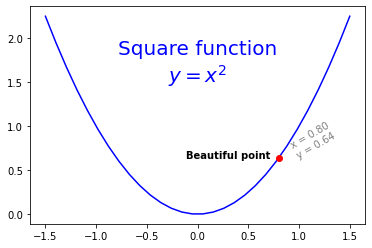

In [12]:
x = np.linspace(-1.5, 1.5, 30)
px = 0.8
py = px**2

plt.plot(x, x**2, "b-", px, py, "ro")

plt.text(0, 1.5, "Square function\n$y = x^2$", fontsize=20, color='blue', \
         horizontalalignment="center")
plt.text(px - 0.08, py, "Beautiful point", ha="right", weight="heavy")
plt.text(px+0.1, py, "x = %0.2f\ny = %0.2f"%(px, py), rotation=30, color='gray')

plt.show()

Nota: `ha` es un alias para `horizontalalignment`  
Para obtener más propiedades de texto, visite [la documentación](https://matplotlib.org/2.0.2/users/text_props.html).

Es bastante frecuente anotar elementos de un gráfico, como el hermoso punto de arriba. 

La función `annotate()` lo hace fácil: simplemente indique la ubicación del punto de interés y la posición del texto, además de, opcionalmente, algunos atributos adicionales para el texto y la flecha.

In [ ]:
plt.plot(x, x**2, px, py, "ro")
plt.annotate("Beautiful point", xy=(px, py), xytext=(px-1.3,py+0.5),
                           color="green", weight="heavy", fontsize=14,
                           arrowprops={"facecolor": "lightgreen"})
plt.show()

También puede agregar un cuadro delimitador alrededor de su texto usando el atributo `bbox`:

In [ ]:
plt.plot(x, x**2, px, py, "ro")

bbox_props = dict(boxstyle="rarrow,pad=0.3", ec="b", lw=2, fc="lightblue")
plt.text(px-0.2, py, "Beautiful point", bbox=bbox_props, ha="right")

bbox_props = dict(boxstyle="round4,pad=1,rounding_size=0.2", ec="black", fc="#EEEEFF", lw=5)
plt.text(0, 1.5, "Square function\n$y = x^2$", fontsize=20, color='black', ha="center", bbox=bbox_props)

plt.show()

Solo por diversión, si desea un gráfico de estilo xkcd, simplemente dibuje dentro de una sección con plt.xkcd():

In [ ]:
with plt.xkcd():
    plt.plot(x, x**2, px, py, "ro")

    bbox_props = dict(boxstyle="rarrow,pad=0.3", ec="b", lw=2, fc="lightblue")
    plt.text(px-0.2, py, "Beautiful point", bbox=bbox_props, ha="right")

    bbox_props = dict(boxstyle="round4,pad=1,rounding_size=0.2", ec="black", fc="#EEEEFF", lw=5)
    plt.text(0, 1.5, "Square function\n$y = x^2$", fontsize=20, color='black', ha="center", bbox=bbox_props)

    plt.show()

## Leyendas

La forma más sencilla de agregar una leyenda es establecer una etiqueta en todas las líneas y luego llamar a la función `legend()`.

In [ ]:
x = np.linspace(-1.4, 1.4, 50)
plt.plot(x, x**2, "r--", label="Square function")
plt.plot(x, x**3, "g-", label="Cube function")
plt.legend(loc="best")
plt.grid(True)
plt.show()

## Escalas no lineales

`Matplotlib` admite escalas no lineales, como escalas logarítmicas o logit.

<ipython-input-13-cb1b3b44c470>:24: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale('symlog', linthreshy=0.05)


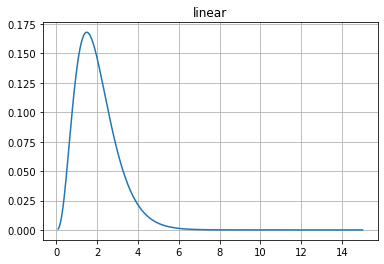

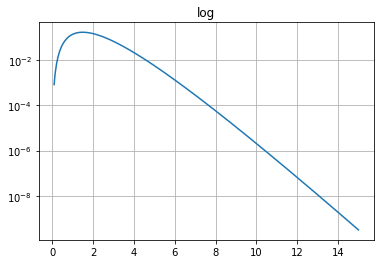

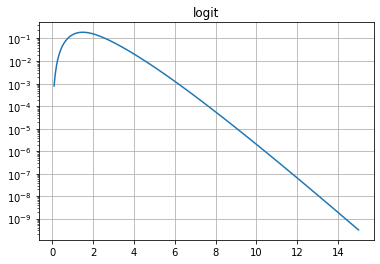

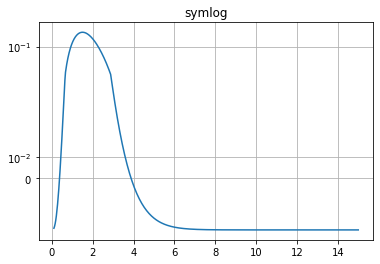

In [13]:
x = np.linspace(0.1, 15, 500)
y = x**3/np.exp(2*x)

plt.figure(1)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)


plt.figure(2)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)



plt.show()

## Ticks y tickers

Los axes tienen pequeñas marcas llamadas "ticks". 

Para ser precisos, los "ticks" son las ubicaciones de las marcas (por ejemplo, (-1, 0, 1)), las "líneas de marca" son las líneas pequeñas dibujadas en esas ubicaciones, las "etiquetas de marca" son las etiquetas dibujadas junto a la las líneas de tick y los "tickers" son objetos que son capaces de decidir dónde colocar los ticks. 

Los tickers predeterminados suelen hacer un buen trabajo al colocar entre 5 y 8 ticks a una distancia razonable entre sí.

Pero a veces necesita más control (p. ej., hay demasiadas etiquetas de marca en el gráfico logit anterior). 

Afortunadamente, `matplotlib` le brinda control total sobre los ticks. 

Incluso puedes activar ticks menores.

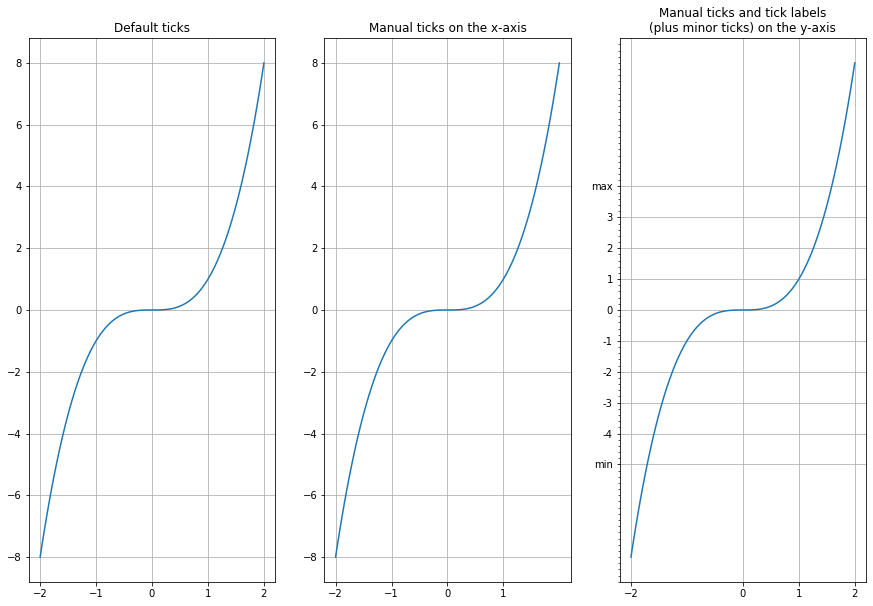

In [14]:
x = np.linspace(-2, 2, 100)

plt.figure(1, figsize=(15,10))
plt.subplot(131)
plt.plot(x, x**3)
plt.grid(True)
plt.title("Default ticks")

ax = plt.subplot(132)
plt.plot(x, x**3)
ax.xaxis.set_ticks(np.arange(-2, 2, 1))
plt.grid(True)
plt.title("Manual ticks on the x-axis")

ax = plt.subplot(133)
plt.plot(x, x**3)
plt.minorticks_on()
ax.tick_params(axis='x', which='minor', bottom=False)
ax.xaxis.set_ticks([-2, 0, 1, 2])
ax.yaxis.set_ticks(np.arange(-5, 5, 1))
ax.yaxis.set_ticklabels(["min", -4, -3, -2, -1, 0, 1, 2, 3, "max"])
plt.title("Manual ticks and tick labels\n(plus minor ticks) on the y-axis")


plt.grid(True)

plt.show()

## proyección polar

Dibujar un gráfico polar es tan fácil como establecer el atributo `projection` en `polar` al crear la subparcela(subplot).

In [ ]:
radius = 1
theta = np.linspace(0, 2*np.pi*radius, 1000)

plt.subplot(111, projection='polar')
plt.plot(theta, np.sin(5*theta), "g-")
plt.plot(theta, 0.5*np.cos(20*theta), "b-")
plt.show()

## proyección 3D

Trazar gráficos 3D es bastante sencillo. 

Debe importar `Axes3D`, que registra la proyección `3d`. 

Luego cree una subparcela configurando `projection` en `3d`. 

Esto devuelve un objeto `Axes3DSubplot`, que puede usar para llamar a `plot_surface`, proporcionando coordenadas `x`, `y` y `z`, además de atributos opcionales.

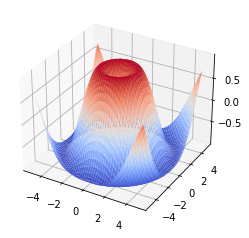

In [17]:
import matplotlib 
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

figure = plt.figure(1, figsize = (12, 4))
subplot3d = plt.subplot(111, projection='3d')
surface = subplot3d.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0.1)
plt.show()

Otra forma de mostrar estos mismos datos es a través de un gráfico de contorno.

In [ ]:
plt.contourf(X, Y, Z, cmap=matplotlib.cm.coolwarm)
plt.colorbar()
plt.show()

## Gráfico de dispersión

Para dibujar un diagrama de dispersión, simplemente proporcione las coordenadas `x` e `y` de los puntos.

In [ ]:
from numpy.random import rand
x, y = rand(2, 100)
plt.scatter(x, y)
plt.show()

También puede proporcionar opcionalmente la escala de cada punto.

In [ ]:
x, y, scale = rand(3, 100)
scale = 500 * scale ** 5
plt.scatter(x, y, s=scale)
plt.show()

Y, como de costumbre, hay una serie de otros atributos que puede configurar, como los colores de relleno (`fill`) y borde (`edge`) y el nivel alfa (`alpha`).

In [ ]:
for color in ['red', 'green', 'blue']:
    n = 100
    x, y = rand(2, n)
    scale = 500.0 * rand(n) ** 5
    plt.scatter(x, y, s=scale, c=color, alpha=0.3, edgecolors='blue')

plt.grid(True)

plt.show()

## Líneas

Puede dibujar líneas simplemente usando la función `plot()`, como lo hemos hecho hasta ahora. 

Sin embargo, a menudo es conveniente crear una función de utilidad que trace una línea (aparentemente) infinita a lo largo del gráfico, dada una pendiente y una intersección. 

También puede usar las funciones `hlines` y `vlines` que trazan segmentos de línea horizontales y verticales. Por ejemplo:

In [ ]:
from numpy.random import randn

def plot_line(axis, slope, intercept, **kargs):
    xmin, xmax = axis.get_xlim()
    plt.plot([xmin, xmax], [xmin*slope+intercept, xmax*slope+intercept], **kargs)

x = randn(1000)
y = 0.5*x + 5 + randn(1000)*2
plt.axis([-2.5, 2.5, -5, 15])
plt.scatter(x, y, alpha=0.2)
plt.plot(1, 0, "ro")
plt.vlines(1, -5, 0, color="red")
plt.hlines(0, -2.5, 1, color="red")
plot_line(axis=plt.gca(), slope=0.5, intercept=5, color="magenta")
plt.grid(True)
plt.show()

## Histogramas

In [ ]:
data = [1, 1.1, 1.8, 2, 2.1, 3.2, 3, 3, 3, 3]
plt.subplot(211)
plt.hist(data, bins = 10, rwidth=0.8)

plt.subplot(212)
plt.hist(data, bins = [1, 1.5, 2, 2.5, 3], rwidth=0.95)
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.show()

In [ ]:
data1 = np.random.randn(400)
data2 = np.random.randn(500) + 3
data3 = np.random.randn(450) + 6
data4a = np.random.randn(200) + 9
data4b = np.random.randn(100) + 10

plt.hist(data1, bins=5, color='g', alpha=0.75, label='bar hist') # default histtype='bar'
plt.hist(data2, color='b', alpha=0.65, histtype='stepfilled', label='stepfilled hist')
plt.hist(data3, color='r', histtype='step', label='step hist')
plt.hist((data4a, data4b), color=('r','m'), alpha=0.55, histtype='barstacked', label=('barstacked a', 'barstacked b'))

plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

## Imágenes

Leer, generar y trazar imágenes en `matplotlib` es bastante sencillo.

Para leer una imagen, simplemente importe el módulo `matplotlib.image` y llame a su función `imread`, pasándole el nombre del archivo (u objeto del archivo). 

Esto devuelve los datos de la imagen, como una matriz NumPy. 

Intentemos esto con la imagen `my_square_function.png` que guardamos anteriormente.

In [ ]:
import matplotlib.image as mpimg

img = mpimg.imread('my_square_function.png')
print(img.shape, img.dtype)

Hemos cargado una imagen de 288x432. Cada píxel está representado por una matriz de 4 elementos: niveles rojo, verde, azul y alfa, almacenados como flotantes de 32 bits entre 0 y 1. Ahora todo lo que tenemos que hacer es llamar a `imshow`:

In [ ]:
plt.imshow(img)
plt.show()

Tadaaa! Es posible que desee ocultar los ejes cuando muestra una imagen:

In [ ]:
plt.imshow(img)
plt.axis('off')
plt.show()


Es igual de fácil generar tu propia imagen:

In [ ]:
img = np.arange(100*100).reshape(100, 100)
print(img)
plt.imshow(img)
plt.show()

Como no proporcionamos niveles RGB, la función `imshow` asigna automáticamente los valores a un degradado de color. 

De forma predeterminada, el degradado de color va de azul (para valores bajos) a rojo (para valores altos), pero puede seleccionar otro mapa de colores. Por ejemplo:

In [ ]:
plt.imshow(img, cmap="hot")
plt.show()

También puede generar una imagen RGB directamente:

In [ ]:
img = np.empty((20,30,3))
img[:, :10] = [0, 0, 0.6]
img[:, 10:20] = [1, 1, 1]
img[:, 20:] = [0.6, 0, 0]
plt.imshow(img)
plt.show()

Dado que la matriz img es bastante pequeña (20x30), cuando la función `imshow` la muestra, aumenta la imagen al tamaño de la figura. 

Imagine estirar la imagen original, dejando espacios en blanco entre los píxeles originales. ¿Cómo `imshow` llena los espacios en blanco? 

Bueno, de forma predeterminada, solo colorea cada píxel en blanco usando el color del píxel que no está en blanco más cercano. Esta técnica puede dar lugar a imágenes pixeladas. 

Si lo prefiere, puede utilizar un método de interpolación diferente, como la interpolación bilineal para rellenar los píxeles en blanco. Esto conduce a bordes borrosos, que pueden ser más agradables en algunos casos:

In [ ]:
plt.imshow(img, interpolation="bilinear")
plt.show()

## animaciones

Aunque `matplotlib` se usa principalmente para generar imágenes, también es capaz de mostrar animaciones. Primero, necesita importar `matplotlib.animation`.

In [19]:
import matplotlib.animation as animation

En el siguiente ejemplo, comenzamos creando puntos de datos, luego creamos un gráfico vacío, definimos la función de actualización que se llamará en cada iteración de la animación y, finalmente, agregamos una animación al gráfico mediante la creación de una instancia de FuncAnimation.

El constructor `FuncAnimation` toma una figura, una función de actualización y argumentos opcionales.

 Especificamos que queremos una animación de 50 cuadros de duración, con 100 ms entre cada cuadro. 

En cada iteración, `FuncAnimation` llama a nuestra función de actualización y le pasa el número de cuadro num (de 0 a 49 en nuestro caso) seguido de los argumentos adicionales que especificamos con fargs.

Nuestra función de actualización simplemente establece que los datos de la línea sean los primeros números de puntos de datos (para que los datos se extraigan gradualmente) y, solo por diversión, también agregamos un pequeño número aleatorio a cada punto de datos para que la línea parezca moverse.

In [20]:
x = np.linspace(-1, 1, 100)
y = np.sin(x**2*25)
data = np.array([x, y])

fig = plt.figure()
line, = plt.plot([], [], "r-") # start with an empty plot
plt.axis([-1.1, 1.1, -1.1, 1.1])
plt.plot([-0.5, 0.5], [0, 0], "b-", [0, 0], [-0.5, 0.5], "b-", 0, 0, "ro")
plt.grid(True)
plt.title("Marvelous animation")

# this function will be called at every iteration
def update_line(num, data, line):
    line.set_data(data[..., :num] + np.random.rand(2, num) / 25)  # we only plot the first `num` data points.
    return line,

line_ani = animation.FuncAnimation(fig, update_line, frames=50, fargs=(data, line), interval=100)
plt.close() # call close() to avoid displaying the static plot

A continuación, mostremos la animación. Una opción es convertirlo a código HTML5 (usando una etiqueta <video>) y renderizar este código usando `IPython.display.HTML`:

In [21]:
from IPython.display import HTML

HTML(line_ani.to_html5_video())

Para instalar utilice el siguiente código:  

conda install -c conda-forge ffmpeg 

que obtienes en la dirección: https://anaconda.org/conda-forge/ffmpeg 

Alternativamente, podemos mostrar la animación usando un pequeño widget interactivo de HTML/Javascript:

In [ ]:
HTML(line_ani.to_jshtml())

## Reflejo de bucle una vez

Puede configurar Matplotlib para usar este widget de forma predeterminada al renderizar animaciones:

In [ ]:
matplotlib.rc('animation', html='jshtml')

Después de eso, ya ni siquiera necesita usar IPython.display.HTML:

In [ ]:
animation.FuncAnimation(fig, update_line, frames=50, fargs=(data, line), interval=100)

## Reflejo de bucle una vez

Advertencia: si guarda el cuaderno junto con sus resultados, las animaciones ocuparán mucho espacio.

## Guardar animaciones en archivos de video

`Matplotlib` se basa en bibliotecas de terceros para escribir videos como FFMPEG o ImageMagick. En este ejemplo, usaremos FFMPEG, así que asegúrese de instalarlo primero. Para guardar la animación en formato GIF, necesitaría ImageMagick.

In [ ]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
line_ani.save('my_wiggly_animation.mp4', writer=writer)

## ¿Qué sigue?

Ahora conoce todos los conceptos básicos de matplotlib, pero hay muchas más opciones disponibles. La mejor manera de obtener más información es visitar [la galería](https://matplotlib.org/2.0.2/gallery.html), mirar las imágenes, elegir una trama que le interese, luego simplemente copiar el código en un cuaderno Jupyter y jugar con él.

## Referentes  

* Galería de gráficos con Matplotlib: https://matplotlib.org/2.0.2/gallery.html